In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import json
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import skimage.transform
import argparse
from scipy.misc import imread, imresize
from PIL import Image
from caption import *
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# python caption.py --img='/datasets/COCO-2015/train2014/COCO_train2014_000000000110.jpg' --model='../../personal_afosado/models/BEST_checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar' --word_map='../../personal_afosado/data/out/WORDMAP_coco_5_cap_per_img_5_min_word_freq.json' --beam_size=5

In [3]:
f = open('../config/caption.json')
jsonread = json.load(f) 
model_fp = jsonread['model_fp']
wordmap_fp=jsonread['wordmap_fp']
img_fp=jsonread['img_fp']
beam_size=jsonread['beam_size']
smooth=jsonread['smooth']

In [4]:
# Load model
checkpoint = torch.load(model_fp, map_location=str(device))
decoder = checkpoint['decoder']
decoder = decoder.to(device)
decoder.eval()
encoder = checkpoint['encoder']
encoder = encoder.to(device)
encoder.eval();

In [5]:
def get_viz(wordmap_fp, img_fp, beam_size, smooth):
    # Load word map (word2ix)
    with open(wordmap_fp, 'r') as j:
        word_map = json.load(j)
    rev_word_map = {v: k for k, v in word_map.items()}  # ix2word

    # Encode, decode with attention and beam search
    seq, alphas = caption_image_beam_search(encoder, decoder, img_fp, word_map, beam_size)
    alphas = torch.FloatTensor(alphas)

    # Visualize caption and attention of best sequence
    visualize_att(img_fp, seq, alphas, rev_word_map, smooth)

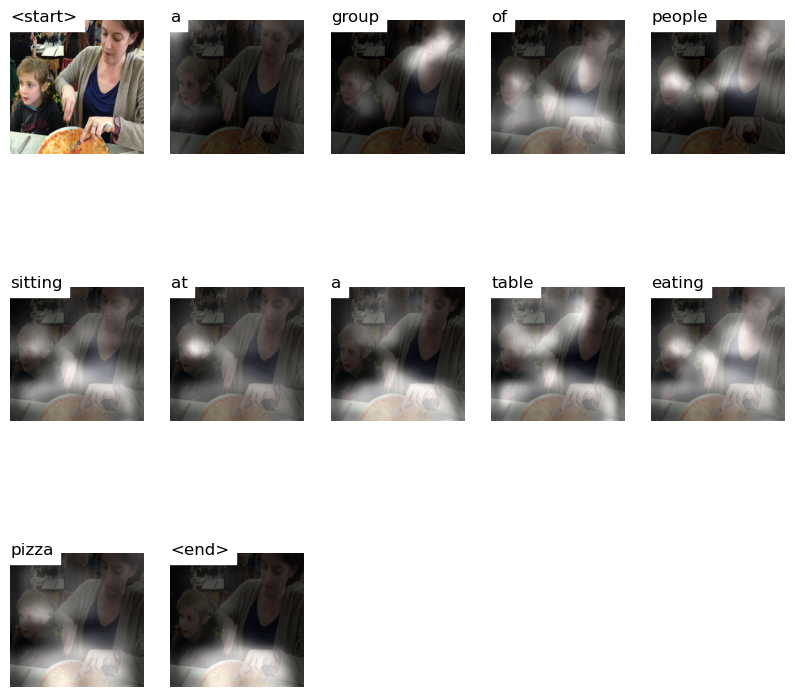

<Figure size 1000x1000 with 0 Axes>

In [6]:
get_viz(wordmap_fp, img_fp, beam_size, smooth)

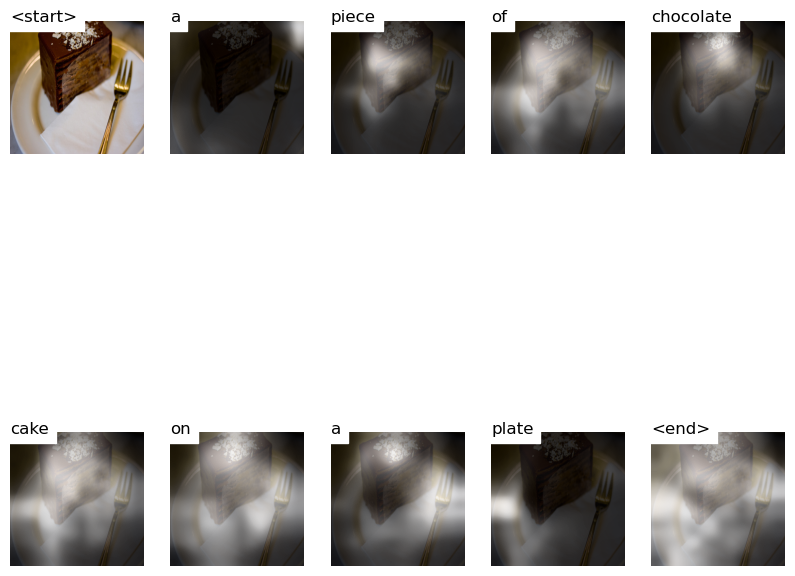

<Figure size 1000x1000 with 0 Axes>

In [7]:
img_fp='/datasets/COCO-2015/train2014/COCO_train2014_000000000092.jpg'
get_viz(wordmap_fp, img_fp, beam_size, smooth)

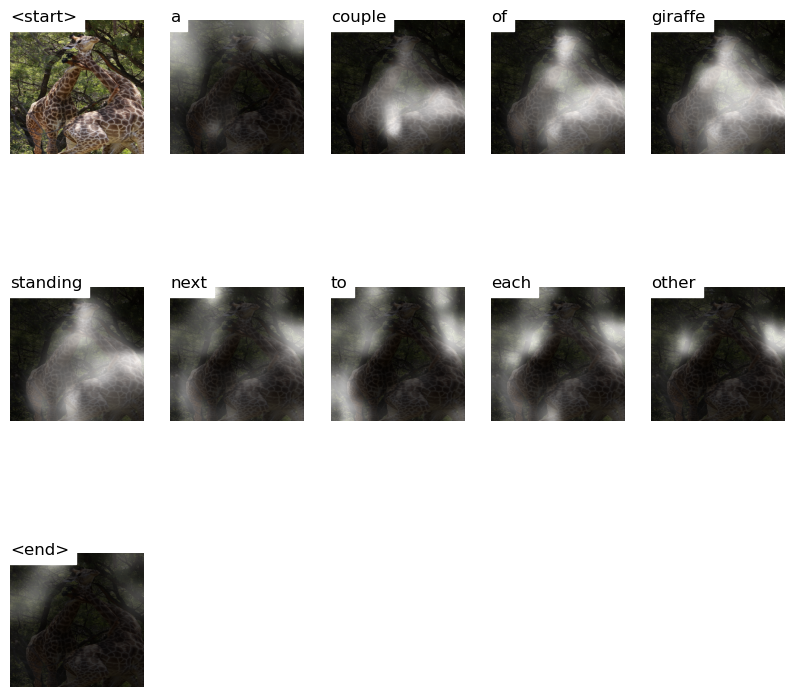

<Figure size 1000x1000 with 0 Axes>

In [8]:
img_fp='/datasets/COCO-2015/train2014/COCO_train2014_000000000072.jpg'
get_viz(wordmap_fp, img_fp, beam_size, smooth)

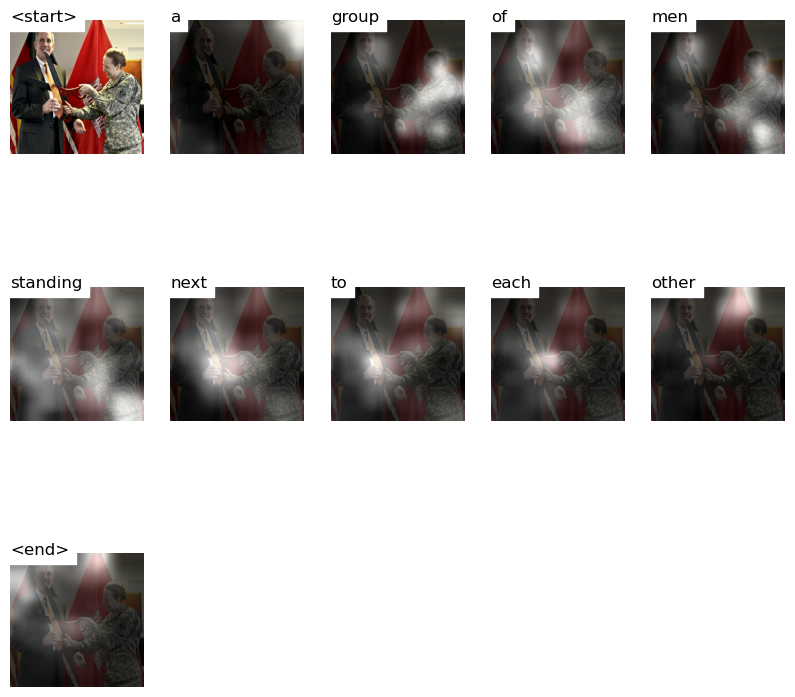

<Figure size 1000x1000 with 0 Axes>

In [9]:
img_fp='/datasets/COCO-2015/train2014/COCO_train2014_000000000165.jpg'
get_viz(wordmap_fp, img_fp, beam_size, smooth)

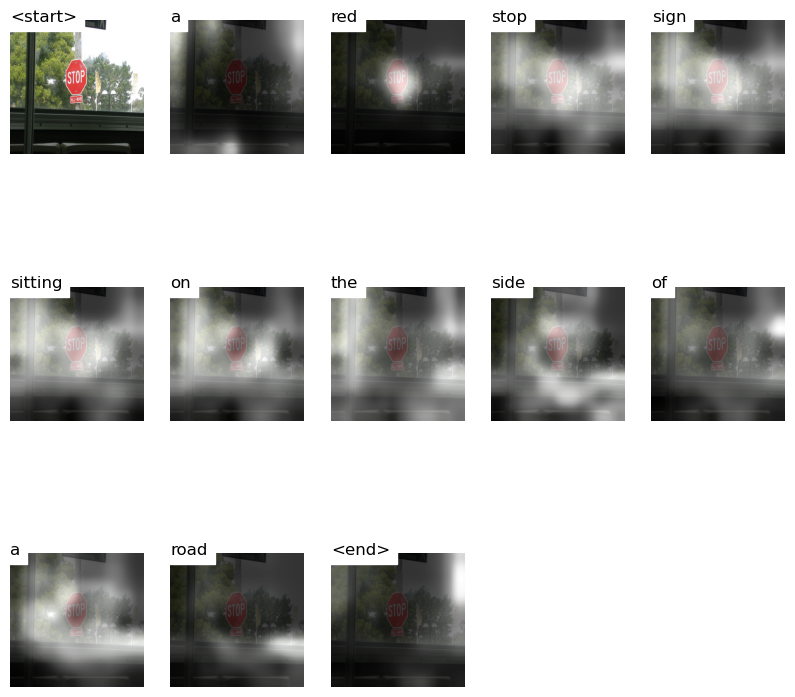

<Figure size 1000x1000 with 0 Axes>

In [10]:
img_fp='/datasets/COCO-2015/train2014/COCO_train2014_000000208244.jpg'
get_viz(wordmap_fp, img_fp, beam_size, smooth)